In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1.Import Libraries and Loading the dataset**

In [101]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [102]:
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/Repository/customer_conversion.csv')
print("shape of the data:", df.shape)
df.head(100)

shape of the data: (45211, 11)


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
95,36,management,married,tertiary,unknown,5,may,426,1,unknown,no
96,55,blue-collar,married,secondary,unknown,5,may,287,1,unknown,no
97,60,retired,married,tertiary,unknown,5,may,101,1,unknown,no
98,39,technician,married,secondary,unknown,5,may,203,1,unknown,no


**2.Data Cleaning**

In [103]:
# Data types of all columns
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [104]:
#Checking missing values
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [105]:
df.shape

(45211, 11)

In [106]:
#Checking Duplicate values
df.duplicated().sum()

6

In [107]:
# Duplicate values dropped
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45205 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45205 non-null  int64 
 1   job             45205 non-null  object
 2   marital         45205 non-null  object
 3   education_qual  45205 non-null  object
 4   call_type       45205 non-null  object
 5   day             45205 non-null  int64 
 6   mon             45205 non-null  object
 7   dur             45205 non-null  int64 
 8   num_calls       45205 non-null  int64 
 9   prev_outcome    45205 non-null  object
 10  y               45205 non-null  object
dtypes: int64(4), object(7)
memory usage: 4.1+ MB


In [108]:
df.duplicated().sum()

0

In [109]:
df.shape

(45205, 11)

In [110]:
# Checking statistical parameters
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


3. Exploratory Data Analysis

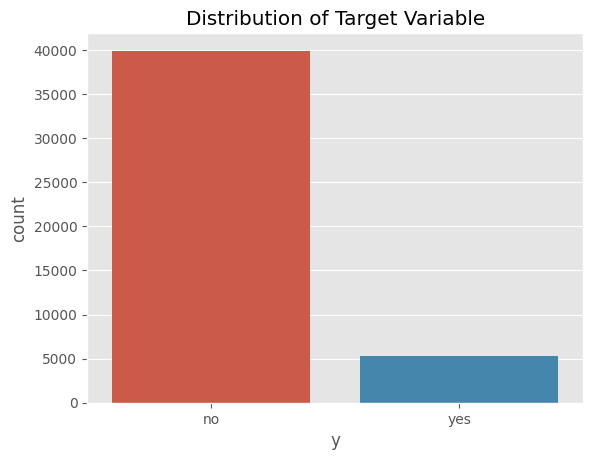

In [111]:

df['y'] = df['y'].astype(str)

# Count Plot
sns.countplot(x='y', data=df)

plt.title("Distribution of Target Variable")
plt.show()

In [112]:
print("percentage of NO and YES\n",df["y"].value_counts()/len(df)*100)

percentage of NO and YES
 no     88.299967
yes    11.700033
Name: y, dtype: float64


Univariate Analysis of Categorical variables

In [113]:
categorical_var= df.select_dtypes(include= ["object"]).columns
categorical_var=categorical_var.drop(['y'])
print(categorical_var)

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome'], dtype='object')


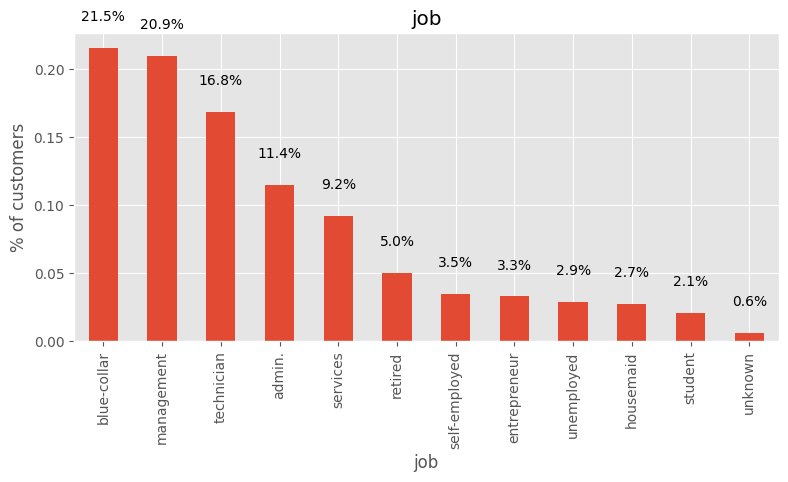

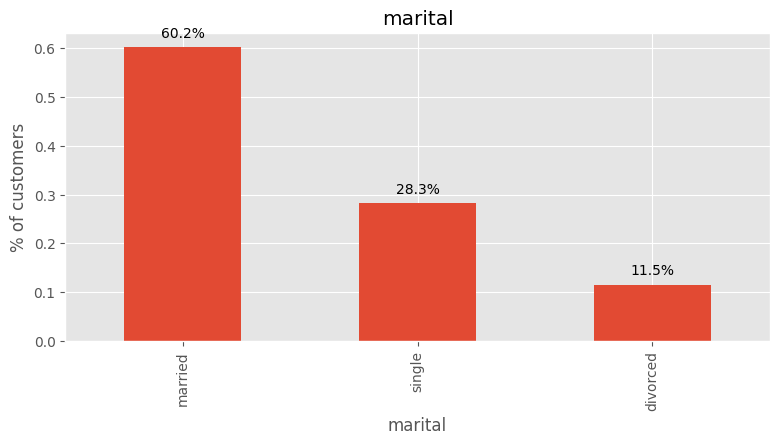

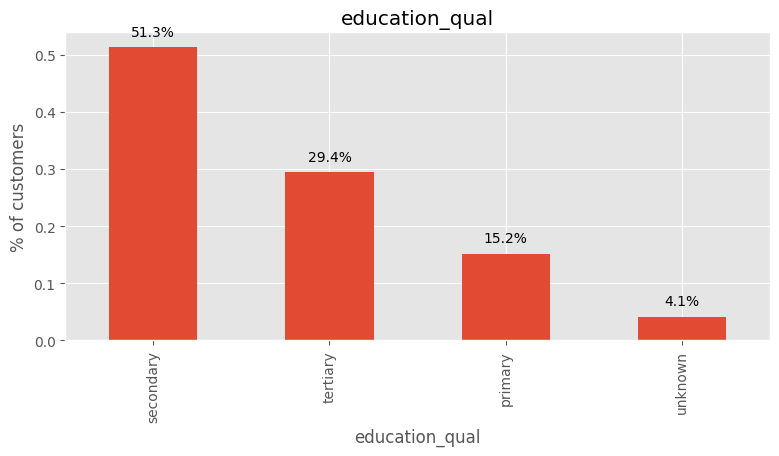

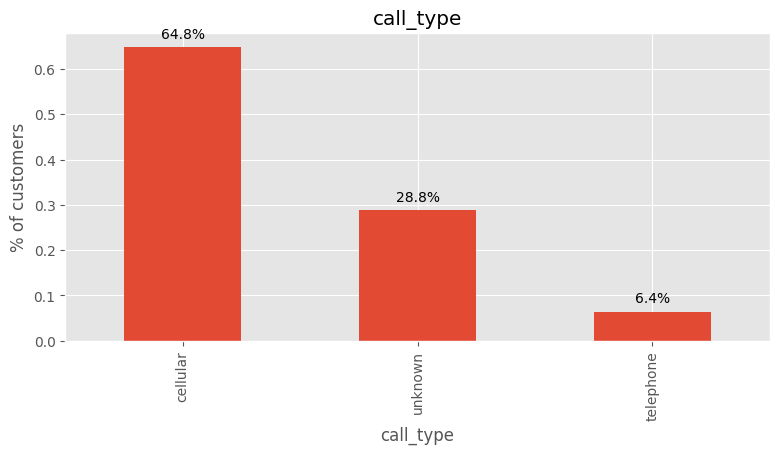

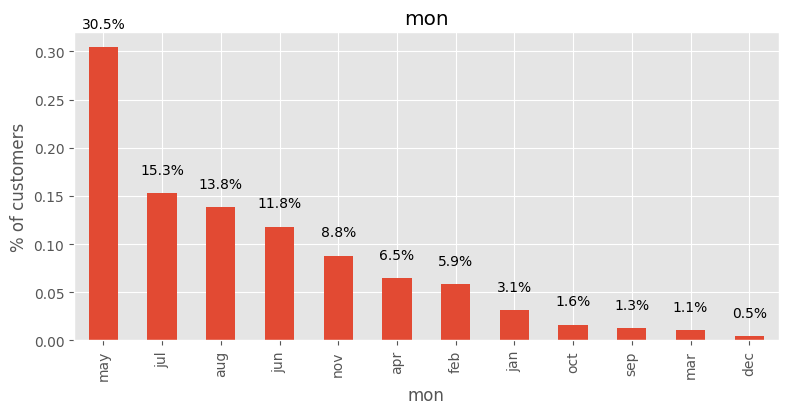

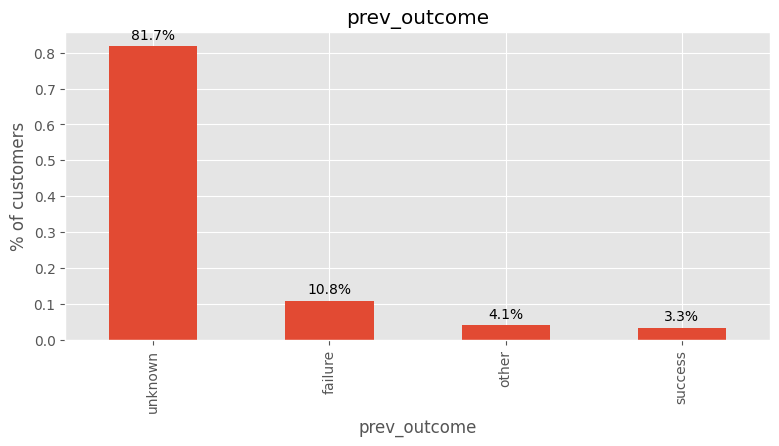

In [114]:
plt.style.use("ggplot")
for column in categorical_var:
    plt.figure(figsize=(20,4))
    ax = plt.subplot(121)
    df[column].value_counts(normalize=True).plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("% of customers")
    plt.title(column)

  # Adding percentage labels to the top of each bar
    for p in ax.patches:
        ax.text(p.get_x()+p.get_width()/2., p.get_height()+0.02, f"{p.get_height()*100:.1f}%", ha="center")

In [115]:
#Checking columns with Unknown valuee
unknown_columns = df.columns[df.isin(['unknown']).any()].tolist()
print(unknown_columns)

['job', 'education_qual', 'call_type', 'prev_outcome']


In [116]:
unknown_columns.pop()
for column in unknown_columns:
    print(f"Unique values in {column}: {df[column].unique()}")

Unique values in job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values in education_qual: ['tertiary' 'secondary' 'unknown' 'primary']
Unique values in call_type: ['unknown' 'cellular' 'telephone']


In [117]:
#Replacing unknown value of the feature variable with the mode of the respective column
for column in unknown_columns:
    mode_value = df[column].mode().iloc[0]
    df[column] = df[column].replace('unknown', mode_value)

In [118]:
df.head(100)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,cellular,5,may,261,1,unknown,no
1,44,technician,single,secondary,cellular,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,cellular,5,may,76,1,unknown,no
3,47,blue-collar,married,secondary,cellular,5,may,92,1,unknown,no
4,33,blue-collar,single,secondary,cellular,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
95,36,management,married,tertiary,cellular,5,may,426,1,unknown,no
96,55,blue-collar,married,secondary,cellular,5,may,287,1,unknown,no
97,60,retired,married,tertiary,cellular,5,may,101,1,unknown,no
98,39,technician,married,secondary,cellular,5,may,203,1,unknown,no


In [119]:
unknown_columns = df.columns[df.isin(['unknown']).any()].tolist()
print(unknown_columns)

['prev_outcome']


Univariate Analysis of Numerical columns

In [120]:
# Checking the continuous variables
num_var= df.select_dtypes(include=np.number)
num_var.head()

,age,day,dur,num_calls
0,58,5,261,1
1,44,5,151,1
2,33,5,76,1
3,47,5,92,1
4,33,5,198,1


<ipython-input-121-c9f537584757>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)
<ipython-input-121-c9f537584757>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)
<ipython-input-121-c9f537584757>:6: UserWarning: 

`distplot` is a deprecated function a

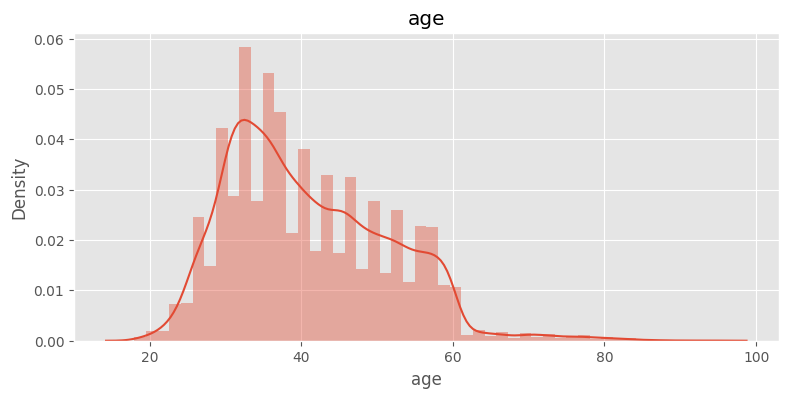

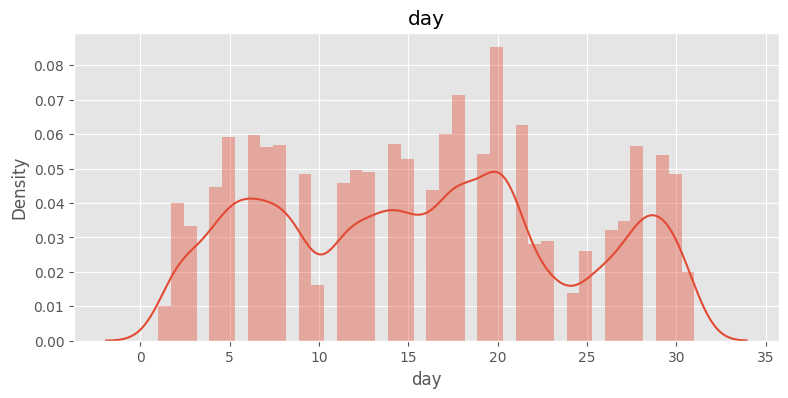

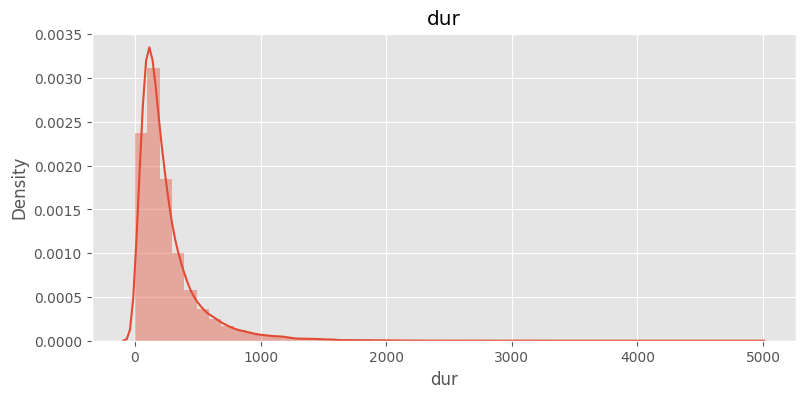

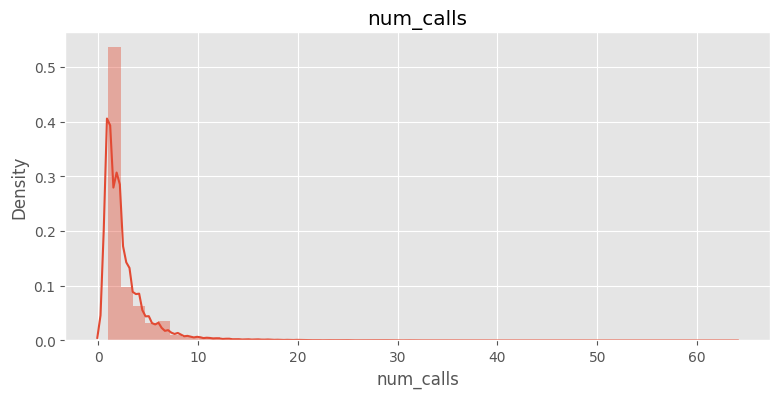

In [121]:
# plotting histogram for each numerical variable
plt.style.use("ggplot")
for column in ["age", "day", "dur",'num_calls']:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(df[column], kde=True)
    plt.title(column)

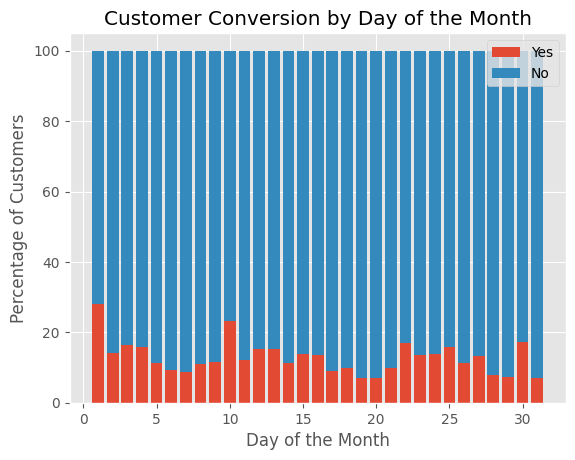

In [122]:
day_counts = df.groupby('day')['y'].value_counts(normalize=True) * 100
yes_counts = day_counts[:, 'yes']
no_counts = day_counts[:, 'no']

plt.bar(day_counts.index.levels[0], yes_counts, label='Yes')
plt.bar(day_counts.index.levels[0], no_counts, bottom=yes_counts, label='No')
plt.xlabel('Day of the Month')
plt.ylabel('Percentage of Customers')
plt.title('Customer Conversion by Day of the Month')
plt.legend()
plt.show()

**BIVARIATE ANALYSIS OF CATEGORICAL COLUMNS**



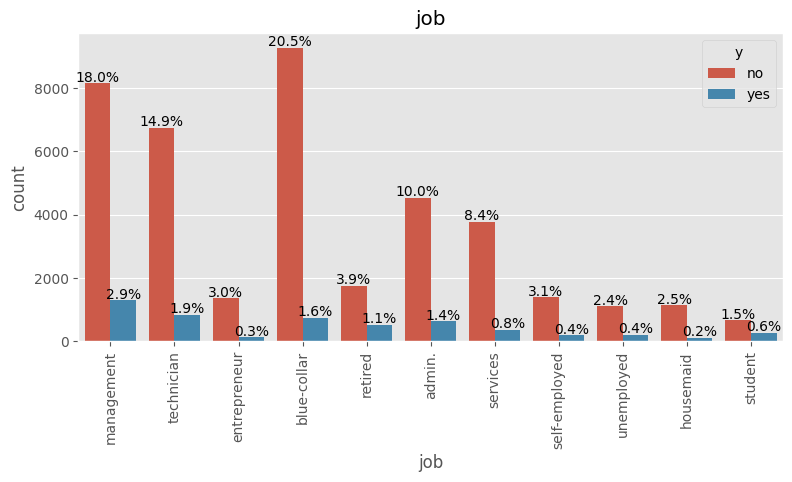

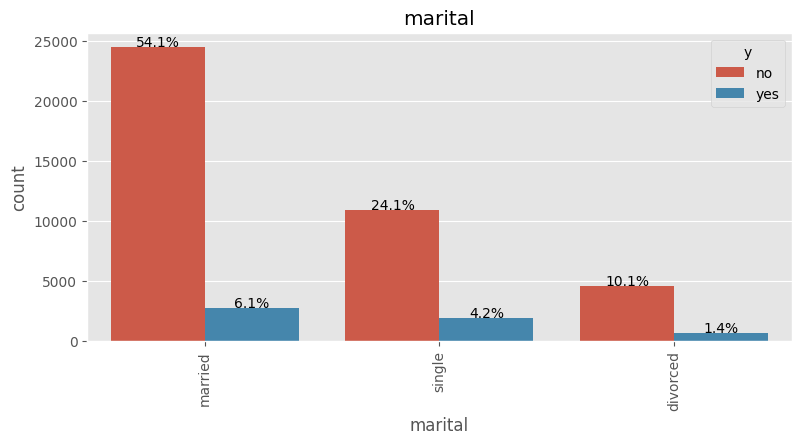

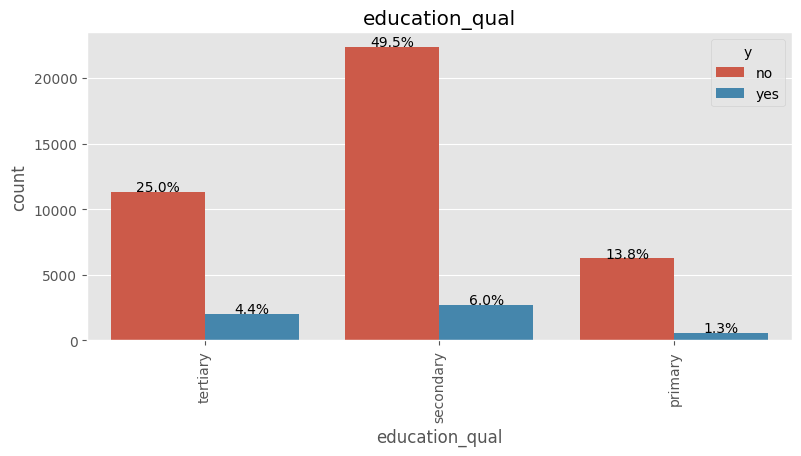

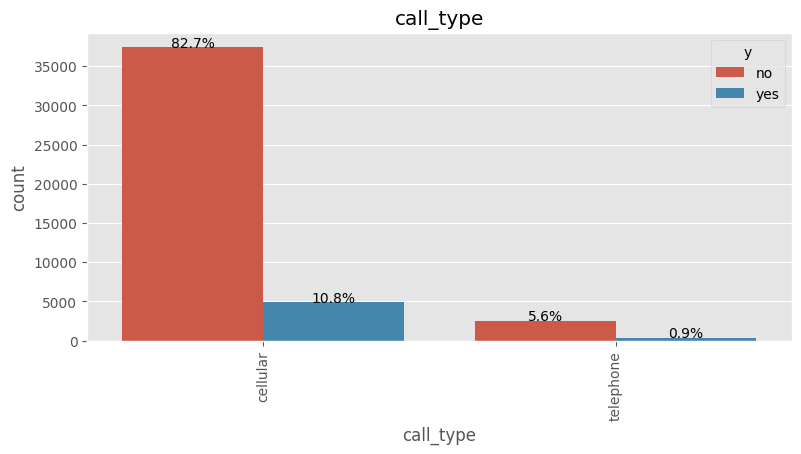

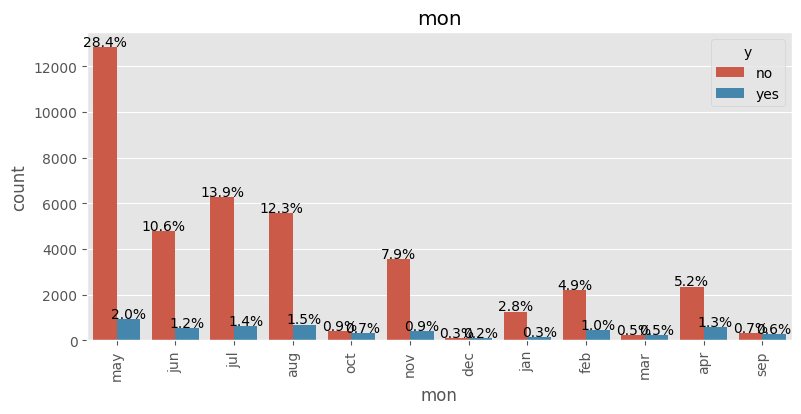

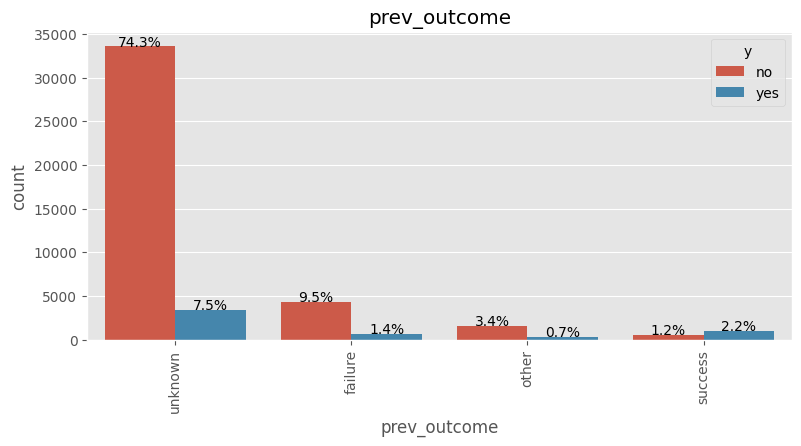

In [123]:

plt.style.use("ggplot")
for column in categorical_var:
    plt.figure(figsize=(20,4))
    ax = plt.subplot(121)
    sns.countplot(x=df[column], hue=df["y"])
    plt.title(column)
    plt.xticks(rotation=90)

    # Add percentage labels to the top of each bar
    for p in ax.patches:
        height = p.get_height()
        total = sum([p.get_height() for p in ax.patches if p.get_x() == p.get_x()])
        ax.text(p.get_x()+p.get_width()/2., height+50, f"{height/total*100:.1f}%", ha="center")

**Handling Outliers**

In [124]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


In [125]:
# Computing interquartile range to calculate the boundaries
lower_boundaries = []
upper_boundaries = []

for column in ["age", "dur", "day", "num_calls"]:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"{column}: {lower_bound}, {upper_bound}")

    lower_boundaries.append(lower_bound)
    upper_boundaries.append(upper_bound)

age: 10.5, 70.5
dur: -221.0, 643.0
day: -11.5, 40.5
num_calls: -2.0, 6.0


In [126]:
# Replacing the outliers which are greater than the upper boundary or less than the lower boundary
for i, column in enumerate(["age", "dur", "day", "num_calls"]):
    df[column] = np.where(df[column] > upper_boundaries[i], int(upper_boundaries[i]), df[column])
    df[column] = np.where(df[column] < lower_boundaries[i], int(lower_boundaries[i]), df[column])

In [127]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.00000,45205.000000
mean,40.863666,15.80688,234.95620,2.392235
std,10.380009,8.32234,176.75476,1.600152
min,18.000000,1.00000,0.00000,1.000000
25%,33.000000,8.00000,103.00000,1.000000
50%,39.000000,16.00000,180.00000,2.000000
75%,48.000000,21.00000,319.00000,3.000000
max,70.000000,31.00000,643.00000,6.000000


**ENCODING CATEGORICAL FEATURES**

In [128]:
cat_var= df.select_dtypes(include= ["object"]).columns
print(cat_var)

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome',
       'y'],
      dtype='object')


In [129]:
for i in cat_var:
    print(i, ":", df[i].unique())

job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
marital : ['married' 'single' 'divorced']
education_qual : ['tertiary' 'secondary' 'primary']
call_type : ['cellular' 'telephone']
mon : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
prev_outcome : ['unknown' 'failure' 'other' 'success']
y : ['no' 'yes']


In [130]:
def encoding_data(df,col):
  for i in col:
     df_dummies = pd.get_dummies(df[i], prefix=i)
     df = pd.concat([df, df_dummies], axis=1)
     df.drop([i],inplace=True,axis=1)
  return df

In [131]:
columns=['call_type','prev_outcome','marital','job']
df=encoding_data(df,columns)

In [132]:
#Months column
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

df['mon'] = df['mon'].apply(
    lambda x: months.index(x)+1
)

In [133]:
#education_qual
df.replace({'education_qual' : { 'tertiary' : 1, 'secondary' : 2, 'primary' : 3 }},inplace=True)

In [134]:
#'y'  target variable
df.replace({'y' : { 'yes' : 1, 'no' : 0}},inplace=True)

In [135]:
df.head()

,age,education_qual,day,mon,dur,num_calls,y,call_type_cellular,call_type_telephone,prev_outcome_failure,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,58,1,5,5,261,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,44,2,5,5,151,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,33,2,5,5,76,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,47,2,5,5,92,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,33,2,5,5,198,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


**HANDLING IMBALANCED DATASET**

In [136]:
#Separating independent and dependent variables
a= df.drop(['y'],axis=1)
b= df['y']

In [137]:
from imblearn.combine import SMOTETomek
# SMOTETomek object with 0.75 sampling strategy
smote_tomek = SMOTETomek(sampling_strategy=0.75)

# Applying SMOTETomek oversampling
X, y = smote_tomek.fit_resample(a, b)

# Now checking the class distribution
print(y.value_counts())

0    39432
1    29453
Name: y, dtype: int64


In [138]:
#Splitting the train and test data using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [139]:
#Scalling using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [140]:
#Importing Required Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,confusion_matrix
from sklearn.metrics import classification_report

**LOGISTIC REGRESSION**

In [141]:
# Fitting Logistic Regression model with Training data
model_logR = LogisticRegression(max_iter=100)
model_logR.fit(X_train, y_train)
predicted=model_logR.predict(X_test)

In [142]:
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")
print ("The aurroc_auc_score of Logistic Regression is : ", roc_auc_score(y_test, model_logR.predict_proba(X_test)[:, 1]))

The accuracy of Logistic Regression is :  91.85618890931966 %
The aurroc_auc_score of Logistic Regression is :  0.9723622382303027


In [143]:

# Classsification Report to check Precision Recall F1 Score and Confusion Matrix
cm = confusion_matrix(y_test, predicted)
print(cm)
print('Classification Report')
print(classification_report(y_test, predicted))

[[11300   483]
 [ 1200  7683]]
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     11783
           1       0.94      0.86      0.90      8883

    accuracy                           0.92     20666
   macro avg       0.92      0.91      0.92     20666
weighted avg       0.92      0.92      0.92     20666



**RANDOM FOREST**

In [144]:
# Fitting Random Forest model with Training data
model_randomf = RandomForestClassifier(n_estimators = 100, random_state = 0)
model_randomf.fit(X_train, y_train)
predicted = model_randomf.predict(X_test)

In [145]:
# Checking model accuracy
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")
print ("The aurroc_auc_score of  random forest is : ", roc_auc_score(y_test, model_randomf.predict_proba(X_test)[:, 1]))

The accuracy of Random Forest is :  93.70463563340753 %
The aurroc_auc_score of  random forest is :  0.9851242431943803


In [146]:
# Classsification Report to check Precision Recall F1 Score and Confusion Matrix
cm = confusion_matrix(y_test, predicted)
print(cm)
print('Classification Report')
print(classification_report(y_test, predicted))

[[11272   511]
 [  790  8093]]
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     11783
           1       0.94      0.91      0.93      8883

    accuracy                           0.94     20666
   macro avg       0.94      0.93      0.94     20666
weighted avg       0.94      0.94      0.94     20666



**OBSERVATION AND CONCLUSION**

In [147]:
# Checking Importance of Features in Descending order
important_features = model_randomf.feature_importances_
name_of_feature = X.columns
feature_imp_df = pd.DataFrame({'feature':name_of_feature,'Importance':important_features})
feature_imp_df = feature_imp_df.sort_values(by = 'Importance',ascending = False)

In [148]:
feature_imp_df

,feature,Importance
4,dur,0.295200
11,prev_outcome_unknown,0.102429
0,age,0.078196
2,day,0.065829
3,mon,0.065211
8,prev_outcome_failure,0.054756
1,education_qual,0.033646
5,num_calls,0.033634
13,marital_married,0.030330
16,job_blue-collar,0.029032


Hence, the most important feature in this prediction is the duration of the call with the customer.